EigenFaces - Dimensionality Reduction with PCA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA

In [3]:
# LFW - Labeled Faces in the Wild (dataset)
# min_faces_per_person - Include 60 images of each person
# It is also filtering the dataset to show only those person that has at least 60 images
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [5]:
# Dataset shape 62 x 47 = 2914 dimension
# Use PCA to reduce the dimension
# We have total 1348 images

# Newer version of sklearn, RandomizedPCA is merged with PCA
# faster for large datasets and where the number of principal components is...
# ...significantly smaller than the number of features.
# This speedup is achieved using a stochastic algorithm that quickly finds...
# ...an approximation of the first few principal components. 

pca = RandomizedPCA(150)

In [6]:
# Fit the data to PCA
pca.fit(faces.data)

PCA(n_components=150)

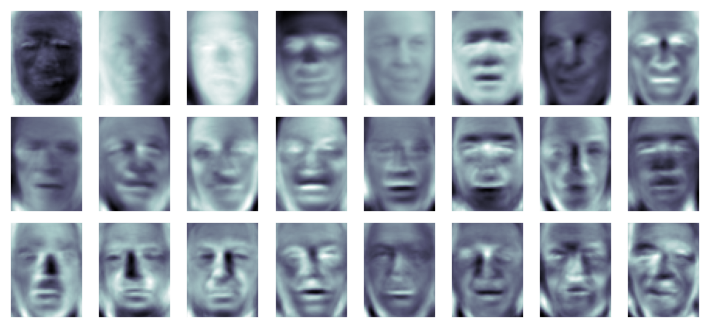

In [7]:
# Visualize the data
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

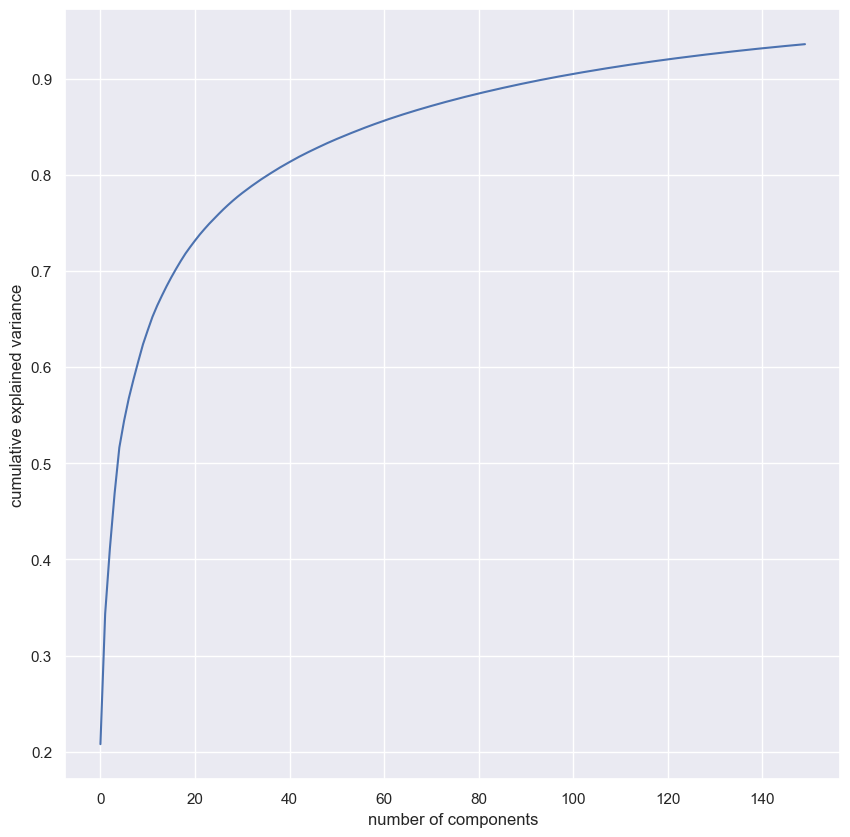

In [8]:
# Plotting cumsum can help in determining number of PCA components
# Plotting it will tell you how much information the PCA is preserving or captured
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# From the graph, we can see that 90% of the information can be captured with...
# ...100 PCA. So, if we are ok with 90% information, we can go for PCA = 100

In [9]:
# Reconstruct the images with PCA

# Taking the principle components and storing in 'components'
# components has each row as an image and each column as one of the PCA

components = pca.transform(faces.data)

In [12]:
# 1348 images with 150 features
components.shape

(1348, 150)

In [10]:
# We use the extracted components to reconstruct the original images
projected = pca.inverse_transform(components)

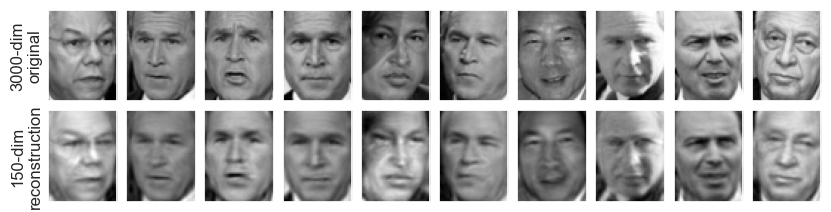

In [11]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('3000-dim\noriginal')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

Making a Python function

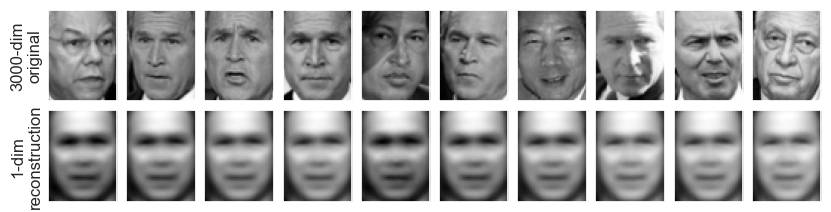

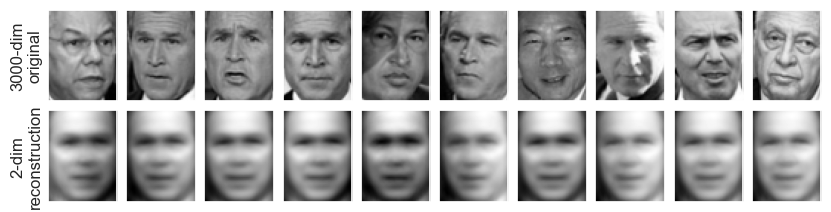

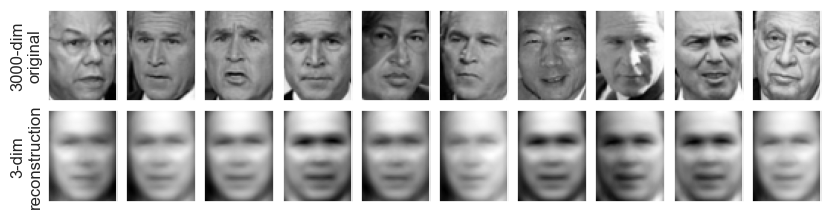

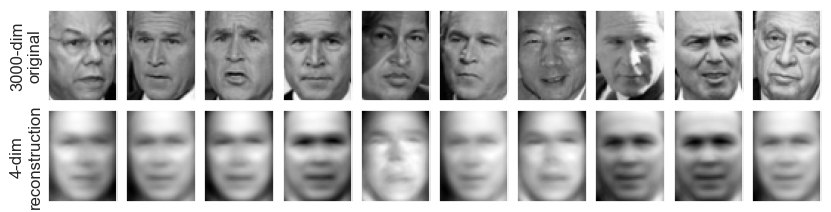

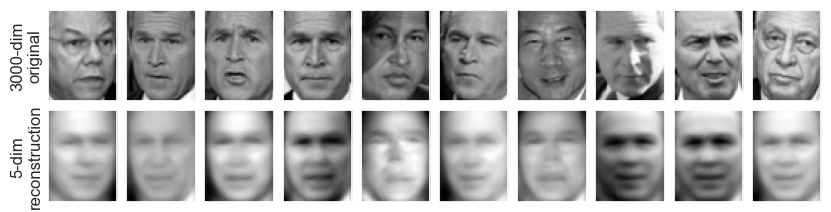

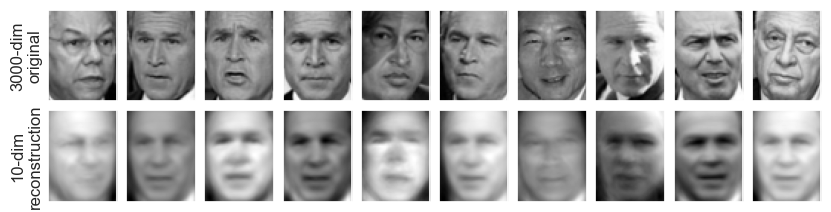

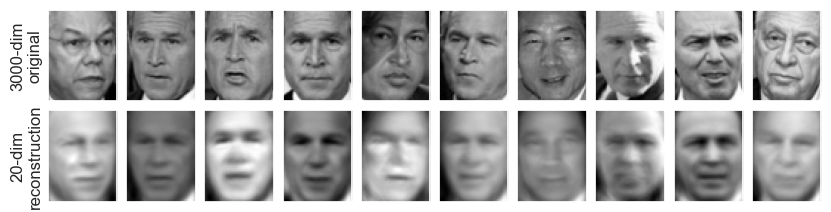

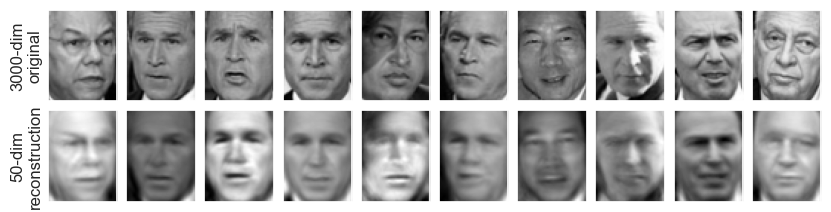

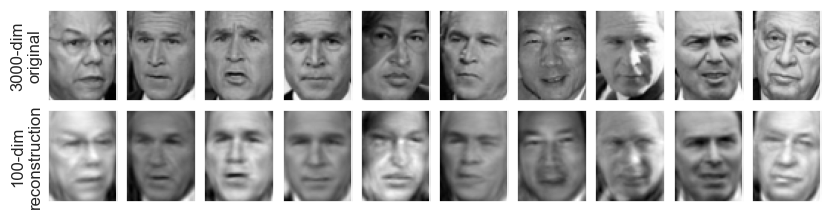

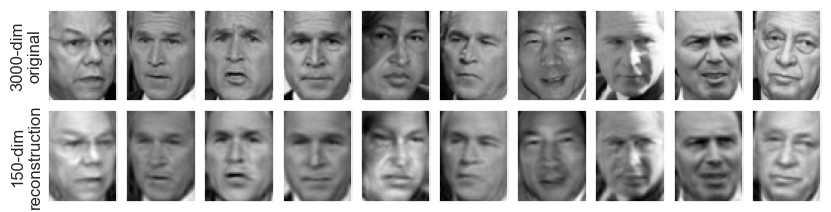

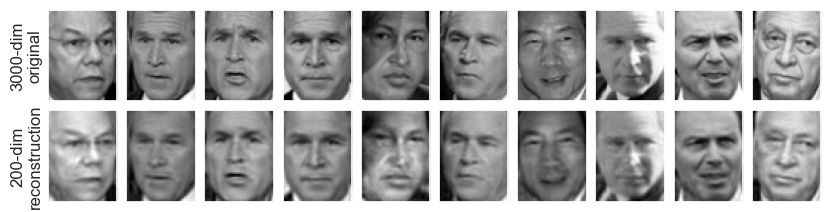

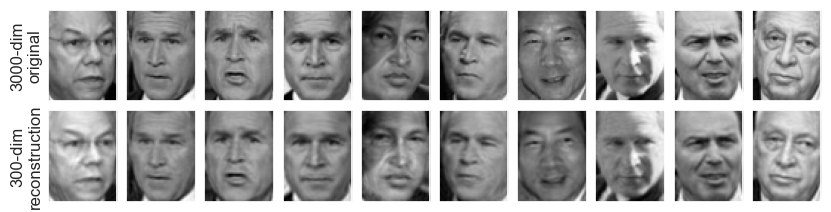

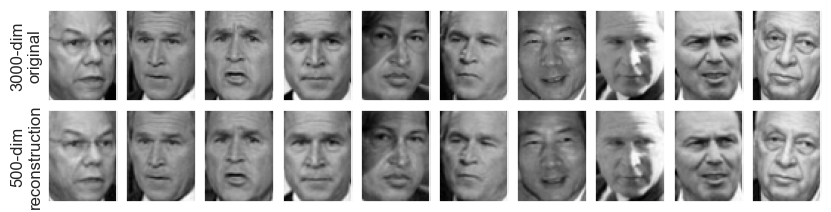

In [13]:
# Function to take PCA components and reconstruct the images
def reconstruct_images(n_components):
    pca = RandomizedPCA(n_components).fit(faces.data)
    components = pca.transform(faces.data)
    projections = pca.inverse_transform(components)
    return projections

# Function to plot the projections
def plot_projections(projections, n):
    fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i in range(10):
        ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
        ax[1, i].imshow(projections[i].reshape(62, 47), cmap='binary_r')

    ax[0, 0].set_ylabel('3000-dim\noriginal')
    ax[1, 0].set_ylabel(f'{n}-dim\nreconstruction')

# Plot the results for different PCA components
components = [1, 2, 3, 4, 5, 10, 20, 50, 100, 150, 200, 300, 500]
for n in components:
    projections = reconstruct_images(n)
    plot_projections(projections, n)

In [ ]:
# Further we can use any ML algorithm to train the model with input - output data
# Using PCA can reduce the computational complexity of any data